## PLANT DISEASE DETECTION

### IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print("TensorFlow version:", tf.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

TensorFlow version: 2.10.0
Pandas version: 2.1.0
Seaborn version: 0.13.0


## DATA PREPROCESSING

### TRAINING IMAGE PREPROCESSING

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### VALIDATION IMAGE PREPROCESSING

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### BUILDING MODEL

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

### COMPILING AND TRAINING PHASE

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 275s 120ms/step - loss: 1.3531 - accuracy: 0.6001 - val_loss: 0.4728 - val_accuracy: 0.8535
Epoch 2/10
2197/2197 [==============================] - 277s 126ms/step - loss: 0.4225 - accuracy: 0.8655 - val_loss: 0.3973 - val_accuracy: 0.8748
Epoch 3/10
2197/2197 [==============================] - 265s 120ms/step - loss: 0.2546 - accuracy: 0.9185 - val_loss: 0.2169 - val_accuracy: 0.9292
Epoch 4/10
2197/2197 [==============================] - 291s 132ms/step - loss: 0.1797 - accuracy: 0.9408 - val_loss: 0.1501 - val_accuracy: 0.9512
Epoch 5/10
2197/2197 [==============================] - 288s 131ms/step - loss: 0.1298 - accuracy: 0.9574 - val_loss: 0.1348 - val_accuracy: 0.9562
Epoch 6/10
2197/2197 [==============================] - 283s 129ms/step - loss: 0.0990 - accuracy: 0.9677 - val_loss: 0.1162 - val_accuracy: 0.9640
Epoch 7/10
2197/2197 [==============================] - 267s 121ms/step - loss: 0.0807 - accuracy: 0.9738 - val_

### EVALUATING THE MODEL

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 177s 80ms/step - loss: 0.0525 - accuracy: 0.9823
Training accuracy: 0.9823458194732666


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 49s 87ms/step - loss: 0.1518 - accuracy: 0.9524
Validation accuracy: 0.9524242877960205


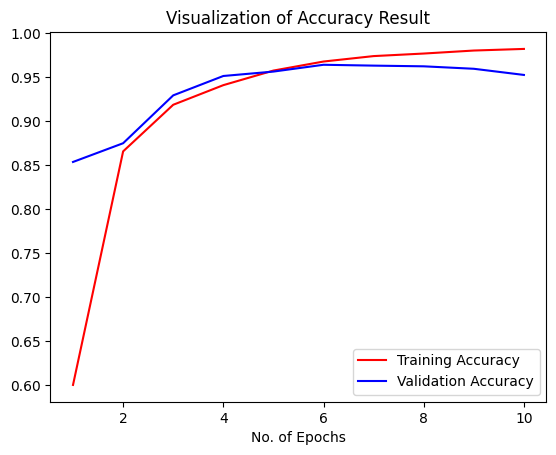

In [21]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [22]:
class_name = validation_set.class_names

In [23]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [24]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 101s 6ms/step


In [25]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [26]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [27]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [29]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.95      0.92       504
                                 Apple___Black_rot       0.94      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.99      0.84      0.91       502
                               Blueberry___healthy       0.92      0.97      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.92      0.95       421
                 Cherry_(including_sour)___healthy       0.89      0.99      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

#### HEAT MAP

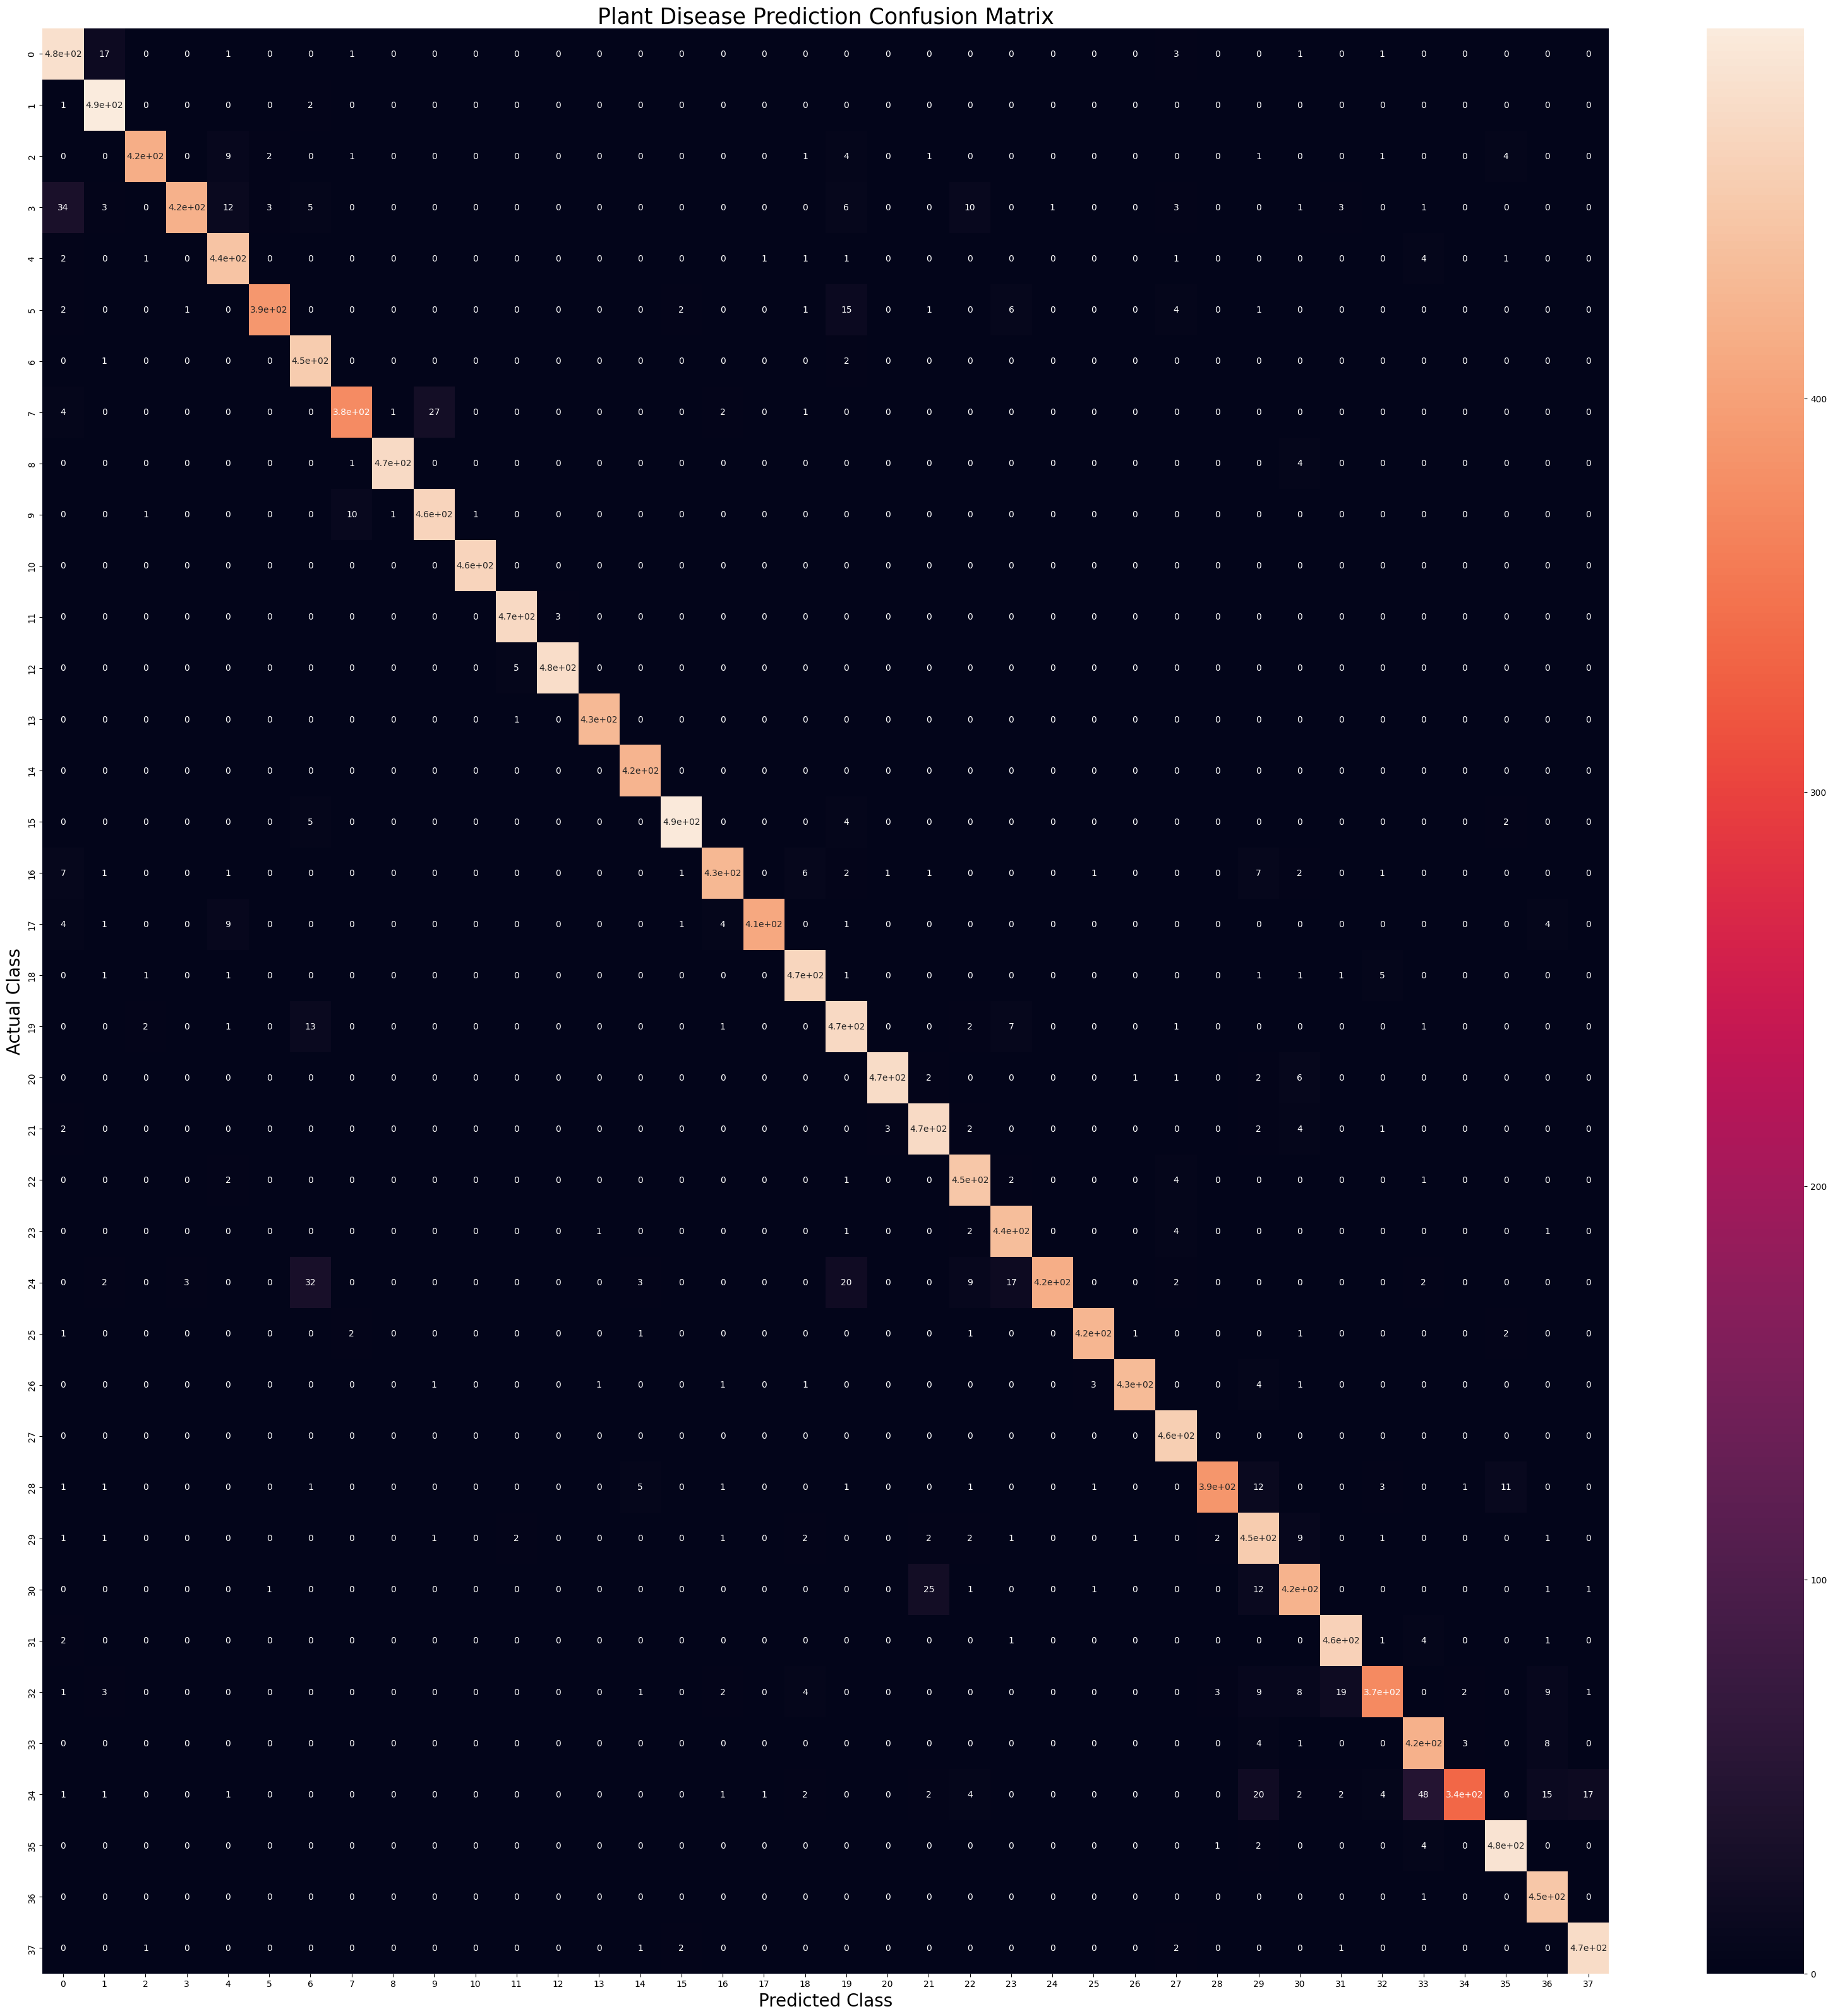

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

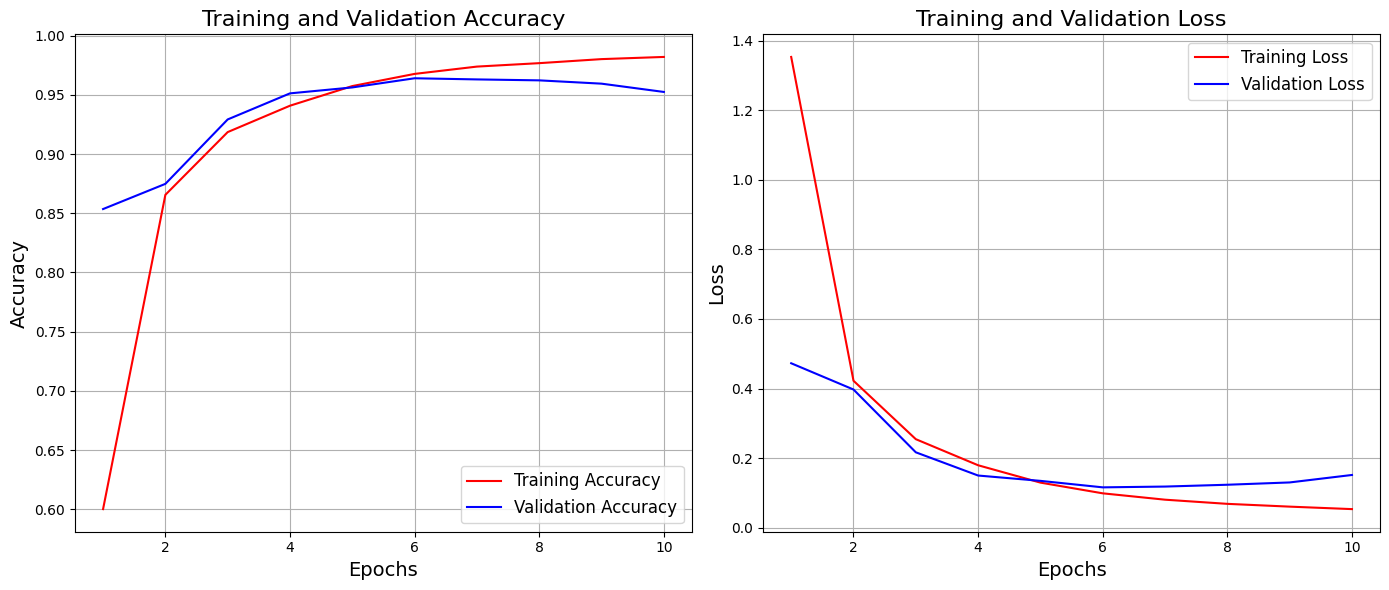

In [31]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Create a list of epochs
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy', color='red')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='blue')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='red')
plt.plot(epochs, val_loss, label='Validation Loss', color='blue')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### SAVING THE MODEL

In [32]:
# Save the model as an HDF5 file
cnn.save('cnn_model.h5')  # Saves the entire model


In [33]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
cnn.save('trained_plant_disease_model.keras')

In [35]:
training_history.history #Return Dictionary of history

{'loss': [1.353081226348877,
  0.422513872385025,
  0.2546238899230957,
  0.17966841161251068,
  0.12977802753448486,
  0.09900099784135818,
  0.08072253316640854,
  0.06875577569007874,
  0.06076757609844208,
  0.053639356046915054],
 'accuracy': [0.6000995635986328,
  0.8655380606651306,
  0.9185148477554321,
  0.9408066272735596,
  0.9573938250541687,
  0.9676648378372192,
  0.9738388061523438,
  0.9767408967018127,
  0.9801550507545471,
  0.9819901585578918],
 'val_loss': [0.47277796268463135,
  0.39732855558395386,
  0.21687987446784973,
  0.15014325082302094,
  0.13483068346977234,
  0.11617893725633621,
  0.11843641102313995,
  0.12367597222328186,
  0.13029327988624573,
  0.15175507962703705],
 'val_accuracy': [0.8535169363021851,
  0.8748008012771606,
  0.9292055368423462,
  0.9512292146682739,
  0.9562371969223022,
  0.9639768004417419,
  0.9630093574523926,
  0.9622126221656799,
  0.9594240784645081,
  0.9524242877960205]}

In [36]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## TESTING THE MODEL

In [37]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [39]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [40]:
!pip install opencv-python

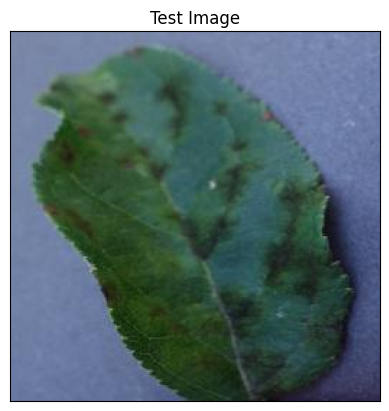

In [46]:
import cv2
import matplotlib.pyplot as plt

image_path = 'test/test/Applescab2.JPG'

# Reading an image in default mode
img = cv2.imread(image_path)

# Converting BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [47]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 244ms/step


In [48]:
print(predictions)

[[9.97210681e-01 2.73433238e-11 6.85759349e-12 2.78905802e-03
  1.41460212e-08 1.69618508e-09 5.13698892e-13 3.19164035e-11
  3.77389092e-12 1.13683486e-10 8.46503076e-11 3.85986382e-13
  8.73924143e-14 4.83987172e-15 2.50330139e-13 7.41192108e-10
  3.20617310e-08 4.18376748e-12 6.47799661e-11 1.40068790e-10
  3.00222069e-09 1.56337698e-09 3.06728705e-11 1.55742430e-13
  6.46804268e-12 2.85913654e-10 5.43502569e-12 2.33176300e-09
  3.10438592e-14 2.26837195e-11 1.03045503e-10 1.74197382e-07
  8.15662468e-11 1.96287739e-14 4.93231378e-13 2.34045927e-14
  3.26906444e-13 7.68884609e-12]]


In [49]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


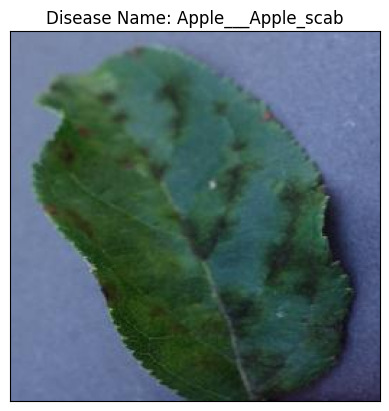

In [50]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()